<a id='intro'></a>
## Introduction

In Venezuela, Baseball is a huge sport. My father is a huge fan and follows the MLB religiously. When I watch games on TV I'm always amazed at the number of statistics that are logged. So, naturally, when I saw that I could do this project with baseball data, I was ecstatic. There’s so much information it covers three centuries of sport. 

There are so many things that pique my interest when I think of baseball, and with Lahman’s database it’s possible I can answer them all. It has pitching, hitting, and fielding statistics for Major League Baseball from 1871 through 2016, plus a lot more of data that started being logged later. 

I narrowed down my interests down to three questions. The first one is how many games do pitchers play today comparted to what they used to play. I’ve seen pitchers being subbed often during games, and there’s such a volume of games that I highly doubt they can play in all of them. The second question is about money, how much is spent on player wages and how much do champions spend compared to the rest? Finally, the third question is about team performance, do winners tend to score a lot? Or do they defend better?

Using Julia, I answer these three questions in this report.


In [1]:
# My packages
using CSV
using DataFrames

<a id='wrangling'></a>
## Data Wrangling
### General Properties

The first thing do is choose the data where I'll find the answers. In this section I load the data and check how it's structured, look at the field names and see which values are available. I use four files of the naseball database: Pitching, Salaries, SeriesPost and Teams.

In [3]:
pitching_ref = CSV.read("../core/Pitching.csv", DataFrame)
pitching = copy(pitching_ref)

Row,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
,String15,Int64,Int64,String3,String3,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64?,Float64?,Int64?,Int64?,Int64?,Int64,Int64?,Int64?,Int64,Int64?,Int64?,Int64?
1,bechtge01,1871,1,PH1,NA,1,2,3,3,2,0,0,78,43,23,0,11,1,missing,7.96,missing,missing,missing,0,missing,missing,42,missing,missing,missing
2,brainas01,1871,1,WS3,NA,12,15,30,30,30,0,0,792,361,132,4,37,13,missing,4.5,missing,missing,missing,0,missing,missing,292,missing,missing,missing
3,fergubo01,1871,1,NY2,NA,0,0,1,0,0,0,0,3,8,3,0,0,0,missing,27.0,missing,missing,missing,0,missing,missing,9,missing,missing,missing
4,fishech01,1871,1,RC1,NA,4,16,24,24,22,1,0,639,295,103,3,31,15,missing,4.35,missing,missing,missing,0,missing,missing,257,missing,missing,missing
5,fleetfr01,1871,1,NY2,NA,0,1,1,1,1,0,0,27,20,10,0,3,0,missing,10.0,missing,missing,missing,0,missing,missing,21,missing,missing,missing
6,flowedi01,1871,1,TRO,NA,0,0,1,0,0,0,0,3,1,0,0,0,0,missing,0.0,missing,missing,missing,0,missing,missing,0,missing,missing,missing
7,mackde01,1871,1,RC1,NA,0,1,3,1,1,0,0,39,20,5,0,3,1,missing,3.46,missing,missing,missing,0,missing,missing,30,missing,missing,missing
8,mathebo01,1871,1,FW1,NA,6,11,19,19,19,1,0,507,261,97,5,21,17,missing,5.17,missing,missing,missing,2,missing,missing,243,missing,missing,missing
9,mcbridi01,1871,1,PH1,NA,18,5,25,25,25,0,0,666,285,113,3,40,15,missing,4.58,missing,missing,missing,0,missing,missing,223,missing,missing,missing


As you can see, older data doesn't have detailed stats as evidenced by the missing values. Nevertheless I only need game data for what I want to find out. 

Now, for the salary data:

In [5]:
salaries_ref = CSV.read("../core/Salaries.csv", DataFrame)
salaries = copy(salaries_ref)

Row,yearID,teamID,lgID,playerID,salary
,Int64,String3,String3,String15,Int64
1,1985,ATL,NL,barkele01,870000
2,1985,ATL,NL,bedrost01,550000
3,1985,ATL,NL,benedbr01,545000
4,1985,ATL,NL,campri01,633333
5,1985,ATL,NL,ceronri01,625000
6,1985,ATL,NL,chambch01,800000
7,1985,ATL,NL,dedmoje01,150000
8,1985,ATL,NL,forstte01,483333
9,1985,ATL,NL,garbege01,772000


This data includes earnings by players, logged under playerID. One important thing is that it's only logged from 1985 onwards, there's no data of earlier seasons.

I want to look at how much do winners spend compared to the rest of the league, so I need to find out who the champions are. Next is the list of post-season winners

In [6]:
ws_winners_ref = CSV.read("../core/SeriesPost.csv", DataFrame)
ws_winners = copy(ws_winners_ref)

Row,yearID,round,teamIDwinner,lgIDwinner,teamIDloser,lgIDloser,wins,losses,ties
,Int64,String7,String3,String3,String3,String3,Int64,Int64,Int64
1,1884,WS,PRO,NL,NY4,AA,3,0,0
2,1885,WS,CHN,NL,SL4,AA,3,3,1
3,1886,WS,SL4,AA,CHN,NL,4,2,0
4,1887,WS,DTN,NL,SL4,AA,10,5,0
5,1888,WS,NY1,NL,SL4,AA,6,4,0
6,1889,WS,NY1,NL,BR3,AA,6,3,0
7,1890,WS,BRO,NL,LS2,AA,3,3,1
8,1892,CS,BSN,NL,CL4,NL,5,0,1
9,1903,WS,BOS,AL,PIT,NL,5,3,0


Here I find the first issue that needs to be addressed. The team column is named teamIDwinner, but it's called teamID in the previous tables I loaded. Also, these records begin in 1884.

Finally, I load the Teams table, that has performace for teams instead of individual players.

In [7]:
teams_ref = CSV.read("../core/Teams.csv", DataFrame)
teams = copy(teams_ref)

Row,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
,Int64,String3,String3,String3,String1?,Int64,Int64,Int64?,Int64,Int64,String1?,String1?,String1?,String1?,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64?,Int64?,Int64?,Int64?,Int64?,Int64,Int64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64?,Float64,String,String?,Int64?,Int64,Int64,String3,String3,String3
1,1871,NA,BS1,BNA,missing,3,31,missing,20,10,missing,missing,N,missing,401,1372,426,70,37,3,60,19,73,missing,missing,missing,303,109,3.55,22,1,3,828,367,2,42,23,225,missing,0.838,Boston Red Stockings,South End Grounds I,missing,103,98,BOS,BS1,BS1
2,1871,NA,CH1,CNA,missing,2,28,missing,19,9,missing,missing,N,missing,302,1196,323,52,21,10,60,22,69,missing,missing,missing,241,77,2.76,25,0,1,753,308,6,28,22,218,missing,0.829,Chicago White Stockings,Union Base-Ball Grounds,missing,104,102,CHI,CH1,CH1
3,1871,NA,CL1,CFC,missing,8,29,missing,10,19,missing,missing,N,missing,249,1186,328,35,40,7,26,25,18,missing,missing,missing,341,116,4.11,23,0,0,762,346,13,53,34,223,missing,0.814,Cleveland Forest Citys,National Association Grounds,missing,96,100,CLE,CL1,CL1
4,1871,NA,FW1,KEK,missing,7,19,missing,7,12,missing,missing,N,missing,137,746,178,19,8,2,33,9,16,missing,missing,missing,243,97,5.17,19,1,0,507,261,5,21,17,163,missing,0.803,Fort Wayne Kekiongas,Hamilton Field,missing,101,107,KEK,FW1,FW1
5,1871,NA,NY2,NNA,missing,5,33,missing,16,17,missing,missing,N,missing,302,1404,403,43,21,1,33,15,46,missing,missing,missing,313,121,3.72,32,1,0,879,373,7,42,22,227,missing,0.839,New York Mutuals,Union Grounds (Brooklyn),missing,90,88,NYU,NY2,NY2
6,1871,NA,PH1,PNA,missing,1,28,missing,21,7,missing,missing,Y,missing,376,1281,410,66,27,9,46,23,56,missing,missing,missing,266,137,4.95,27,0,0,747,329,3,53,16,194,missing,0.845,Philadelphia Athletics,Jefferson Street Grounds,missing,102,98,ATH,PH1,PH1
7,1871,NA,RC1,ROK,missing,9,25,missing,4,21,missing,missing,N,missing,231,1036,274,44,25,3,38,30,53,missing,missing,missing,287,108,4.3,23,1,0,678,315,3,34,16,220,missing,0.821,Rockford Forest Citys,Agricultural Society Fair Grounds,missing,97,99,ROK,RC1,RC1
8,1871,NA,TRO,TRO,missing,6,29,missing,13,15,missing,missing,N,missing,351,1248,384,51,34,6,49,19,62,missing,missing,missing,362,153,5.51,28,0,0,750,431,4,75,12,198,missing,0.845,Troy Haymakers,Haymakers' Grounds,missing,101,100,TRO,TRO,TRO
9,1871,NA,WS3,OLY,missing,4,32,missing,15,15,missing,missing,N,missing,310,1353,375,54,26,6,48,13,48,missing,missing,missing,303,137,4.37,32,0,0,846,371,4,45,13,217,missing,0.85,Washington Olympics,Olympics Grounds,missing,94,98,OLY,WS3,WS3


This one is pretty straightforward, it has season stats for each team and the column names are compatible with the majority of the tables I've loaded. 

### Data Trimming and Cleaning

Now it's time to extract the data I require from these tables. Regarding the pitching stats, since I want to look at game completion, I get the columns for Games, Games Started and Completed Games. Then I group them by year and get their sums.

In [8]:
pitching_year_totals = combine(groupby(pitching[:, [:G, :GS, :CG, :yearID]], :yearID),
    [:G, :GS, :CG] =>
        ((g, gs, cg) -> (G=sum(g), GS=sum(gs), CG=sum(cg), Percentage=sum(cg) ./ sum(gs))) =>
            AsTable)

Row,yearID,G,GS,CG,Percentage
,Int64,Int64,Int64,Int64,Float64
1,1871,277,254,231,0.909449
2,1872,403,366,329,0.898907
3,1873,432,398,364,0.914573
4,1874,489,464,440,0.948276
5,1875,763,690,621,0.9
6,1876,570,520,472,0.907692
7,1877,395,360,326,0.905556
8,1878,385,368,352,0.956522
9,1879,676,642,609,0.948598


We know the data is complete because of the data types in the columns. They don't have the '?' at the end.

Now, to get invidual pitching stats, specifically how much they played, I pull the IPOuts column, group data by year and then use the describe command. This way I get a new data frame with useful statistics such as the average number of innings pitched and the total number of pitchers who appeared in a season. I do the same for the Games statistics.

But, before I do those calculations, don't forget to check for missing values:

In [9]:
view(pitching, :, [:IPouts, :G])

Row,IPouts,G
,Int64,Int64
1,78,3
2,792,30
3,3,1
4,639,24
5,27,1
6,3,1
7,39,3
8,507,19
9,666,25



All is fine, so I proceed:

In [10]:
describe(combine(groupby(pitching[:, [:IPouts, :G, :yearID]], :yearID), [:IPouts, :G] .=> sum))

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Int64,Float64,Int64,Int64,DataType
1,yearID,1943.5,1871,1943.5,2016,0,Int64
2,IPouts_sum,78183.9,6750,66519.0,130960,0,Int64
3,G_sum,7293.17,277,5021.5,20159,0,Int64


For the salary data, I'm not interested in indiduals. I group the data by Year and Team, then calculate sum. This results in a DataFrame with hierarchical index that can be accessed by yearID and teamID using .loc. The resulting table has two indexes, the first is the year, and the second is the teamID.

In [11]:
salaries_total_year_team = combine(groupby(salaries[:, [:salary, :yearID, :teamID]], [:yearID,:teamID]), :salary => sum)

Row,yearID,teamID,salary_sum
,Int64,String3,Int64
1,1985,ATL,14807000
2,1985,BAL,11560712
3,1985,BOS,10897560
4,1985,CAL,14427894
5,1985,CHA,9846178
6,1985,CHN,12702917
7,1985,CIN,8359917
8,1985,CLE,6551666
9,1985,DET,10348143


In [12]:
filter(row -> row.yearID == 2000, salaries_total_year_team)

Row,yearID,teamID,salary_sum
,Int64,String3,Int64
1,2000,ATL,84537836
2,2000,BAL,81447435
3,2000,BOS,77940333
4,2000,CHA,31133500
5,2000,CHN,60539333
6,2000,CIN,46867200
7,2000,CLE,75880771
8,2000,DET,58265167
9,2000,HOU,51289111


In [14]:
using StatsPlots

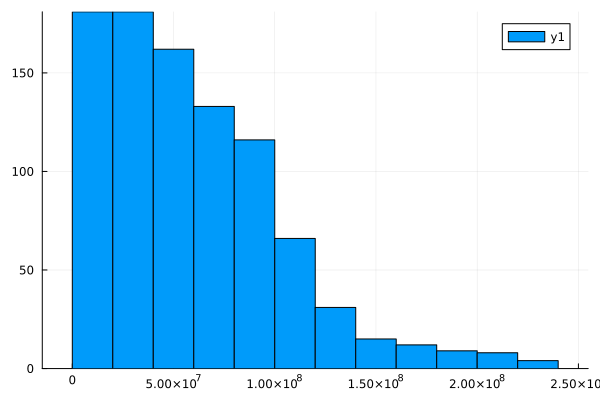

In [15]:
@df salaries_total_year_team histogram(:salary_sum)